# Name: Muhammad Uzair
# Roll No. L1F18BSCS0311
# SEction - G4
# IDS Assignment 4

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt

# Answer 1

In [6]:
table = np.array([[3,4,3,2,1],
                  [4,3,5,1,1],
                  [3,5,3,3,3],
                  [2,1,3,3,2],
                  [1,1,3,2,3]])
names = ['Alice','Bob','Cary','Doug','Edna']
cols = ['Tax Rate','Fee','Interest Rate','Quantity Limit','Price Limit']
df = pd.DataFrame(table)
df.index = names
df.columns = cols
df

,Tax Rate,Fee,Interest Rate,Quantity Limit,Price Limit
Alice,3,4,3,2,1
Bob,4,3,5,1,1
Cary,3,5,3,3,3
Doug,2,1,3,3,2
Edna,1,1,3,2,3


In [10]:
#Similarity Matrix Calculation
similarity = np.full((table.shape[0], table.shape[0]),0)
for index in range(0, similarity.shape[0]):
    for index2 in range(index + 1, similarity.shape[0]): 
        total = 0
        for index3 in range(0, similarity.shape[1]):
            total = total + (table[index][index3] - table[index2][index3])**2
        total = total * -1
        similarity[index][index2] = similarity[index2][index] = total
        
minimum = np.min(similarity)
for index in range(0, similarity.shape[0]):
    for index2 in range(0, similarity.shape[1]): 
        if index == index2:
            similarity[index][index2] = minimum

print("Similarity Matrix:")
simDf = pd.DataFrame(similarity)
simDf.index = names
simDf.columns = names
simDf

Similarity Matrix:


,Alice,Bob,Cary,Doug,Edna
Alice,-22,-7,-6,-12,-17
Bob,-7,-22,-17,-17,-22
Cary,-6,-17,-22,-18,-21
Doug,-12,-17,-18,-22,-3
Edna,-17,-22,-21,-3,-22


In [11]:
#Responsibility matrix calculation
responsibility = np.full((similarity.shape[0], similarity.shape[1]), 0)
for index in range(0, responsibility.shape[0]):
    f = similarity[index].flatten()
    rs = np.sort(f)
    sm = rs[-2]
    for index2 in range(0, responsibility.shape[1]):
        if (similarity[index][index2] == similarity[index].max()):
            responsibility[index][index2] = similarity[index][index2] - sm
        else:
            responsibility[index][index2] = similarity[index][index2] - similarity[index].max()
        
print("Responsibility Matrix:")
resDf = pd.DataFrame(responsibility)
resDf.index = names
resDf.columns = names
resDf

Responsibility Matrix:


,Alice,Bob,Cary,Doug,Edna
Alice,-16,-1,1,-6,-11
Bob,10,-15,-10,-10,-15
Cary,11,-11,-16,-12,-15
Doug,-9,-14,-15,-19,9
Edna,-14,-19,-18,14,-19


In [16]:
#Availaibility Matrix Calculation
def checkMin(num1, num2):
    if(num1 > num2):
        return num2
    else:
        return num1

diagonals = []
for index in range(0, responsibility.shape[0]):
    total = 0
    for index2 in range(0, responsibility.shape[1]):
        if(responsibility[index2][index] > 0):
            total = total + responsibility[index2][index]
    diagonals.append(total)
diagonals

availability = np.full((responsibility.shape[0], responsibility.shape[1]), 0)
for index in range(0, availability.shape[0]):
    for index2 in range(0, availability.shape[1]):
        if index == index2:
            availability[index][index2]= diagonals[index2]
        elif(responsibility[index][index2] < 0):
            availability[index][index2] = checkMin(0, responsibility[index2][index2] + diagonals[index2])
        elif(responsibility[index][index2] >= 0):
            availability[index][index2] = checkMin(0, responsibility[index2][index2] + diagonals[index2] - responsibility[index][index2])

print("Availaibility Matrix:")
availDf = pd.DataFrame(availability)
availDf.index = names
availDf.columns = names
availDf

Availaibility Matrix:


,Alice,Bob,Cary,Doug,Edna
Alice,21,-15,-16,-5,-10
Bob,-5,0,-15,-5,-10
Cary,-6,-15,1,-5,-10
Doug,0,-15,-15,14,-19
Edna,0,-15,-15,-19,9


In [17]:
#Criterion Matrix Calculation
criterion = np.full((similarity.shape[0], similarity.shape[1]), 0)
for index in range(0, criterion.shape[0]):
    for index2 in range(0, criterion.shape[1]):
        criterion[index][index2] = responsibility[index][index2] + availability[index][index2]
        
print("Criterion Matrix:")
criDf = pd.DataFrame(criterion)
criDf.index = names
criDf.columns = names
criDf

Criterion Matrix:


,Alice,Bob,Cary,Doug,Edna
Alice,5,-16,-15,-11,-21
Bob,5,-15,-25,-15,-25
Cary,5,-26,-15,-17,-25
Doug,-9,-29,-30,-5,-10
Edna,-14,-34,-33,-5,-10


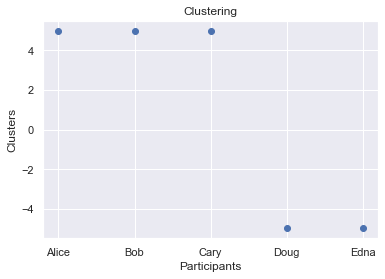

In [19]:
#Plotting
clusters = criterion.max(axis = 1)
fig,ax = plt.subplots()
ax.scatter(names, clusters)
ax.set_xlabel("Participants")
ax.set_ylabel("Clusters")
ax.set_title("Clustering")
plt.show()

# Answer 2

In [20]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
temp = np.zeros((200,3))
temp[:,0]=df['Age']
temp[:,1]=df['Annual Income (k$)']
temp[:,2]=df['Spending Score (1-100)']

In [23]:
#Similarity Matrix Calculation
similarity = np.full((temp.shape[0], temp.shape[0]),0)
for index in range(0, similarity.shape[0]):
    for index2 in range(index + 1, temp.shape[0]): 
        total = 0
        for index3 in range(0, temp.shape[1]):
            total = total + (temp[index][index3] - temp[index2][index3])**2
        total = total * -1
        similarity[index][index2] = similarity[index2][index] = total
        
minimum = np.min(similarity)
for index in range(0, similarity.shape[0]):
    for index2 in range(0, similarity.shape[1]): 
        if index == index2:
            similarity[index][index2] = minimum

print("Similarity Matrix:")
simDf = pd.DataFrame(similarity)
simDf

Similarity Matrix:


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-21480,-1768,-1091,-1461,-149,-1382,-1354,-3050,-3337,-1226,...,-8225,-8813,-10761,-12669,-12338,-12881,-13118,-13715,-15494,-16941
1,-1768,-21480,-5627,-21,-1785,-30,-5830,-182,-7949,-178,...,-11277,-8009,-15077,-9993,-15926,-11225,-15706,-12491,-18974,-14969
2,-1091,-5627,-21480,-5050,-1278,-4905,-229,-7757,-1954,-4465,...,-8054,-11682,-9582,-16958,-11645,-16370,-13209,-16868,-14929,-20670
3,-1461,-21,-5050,-21480,-1434,-3,-5189,-293,-7166,-83,...,-10606,-7714,-14270,-9830,-15113,-10964,-14985,-12190,-18203,-14726
4,-149,-1785,-1278,-1434,-21480,-1377,-1173,-2981,-2462,-1029,...,-7694,-8238,-10244,-11866,-11441,-12146,-12221,-13038,-14885,-16250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-12881,-11225,-16370,-10964,-12146,-10787,-15733,-10773,-16818,-10275,...,-3426,-398,-5094,-202,-4113,-21480,-2737,-70,-4019,-330
196,-13118,-15706,-13209,-14985,-12221,-14714,-12248,-16504,-12435,-13610,...,-675,-2379,-713,-4187,-184,-2737,-21480,-2285,-390,-3371
197,-13715,-12491,-16868,-12190,-13038,-11985,-16297,-12145,-17514,-11457,...,-3134,-554,-4526,-494,-3625,-70,-2285,-21480,-3257,-206
198,-15494,-18974,-14929,-18203,-14885,-17864,-14314,-20018,-15173,-16844,...,-1185,-3757,-677,-5941,-518,-4019,-390,-3257,-21480,-4229


In [24]:
#Responsibility matrix calculation
responsibility = np.full((similarity.shape[0], similarity.shape[1]), 0)
for index in range(0, responsibility.shape[0]):
    f = similarity[index].flatten()
    rs = np.sort(f)
    sm = rs[-2]
    for index2 in range(0, responsibility.shape[1]):
        if (similarity[index][index2] == similarity[index].max()):
            responsibility[index][index2] = similarity[index][index2] - sm
        else:
            responsibility[index][index2] = similarity[index][index2] - similarity[index].max()
        
print("Responsibility Matrix:")
resDf = pd.DataFrame(responsibility)
resDf

Responsibility Matrix:


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-21331,-1619,-942,-1312,159,-1233,-1205,-2901,-3188,-1077,...,-8076,-8664,-10612,-12520,-12189,-12732,-12969,-13566,-15345,-16792
1,-1747,-21459,-5606,9,-1764,-9,-5809,-161,-7928,-157,...,-11256,-7988,-15056,-9972,-15905,-11204,-15685,-12470,-18953,-14948
2,-862,-5398,-21251,-4821,-1049,-4676,125,-7528,-1725,-4236,...,-7825,-11453,-9353,-16729,-11416,-16141,-12980,-16639,-14700,-20441
3,-1458,-18,-5047,-21477,-1431,14,-5186,-290,-7163,-80,...,-10603,-7711,-14267,-9827,-15110,-10961,-14982,-12187,-18200,-14723
4,-92,-1728,-1221,-1377,-21423,-1320,-1116,-2924,-2405,-972,...,-7637,-8181,-10187,-11809,-11384,-12089,-12164,-12981,-14828,-16193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-12811,-11155,-16300,-10894,-12076,-10717,-15663,-10703,-16748,-10205,...,-3356,-328,-5024,-132,-4043,-21410,-2667,132,-3949,-260
196,-12934,-15522,-13025,-14801,-12037,-14530,-12064,-16320,-12251,-13426,...,-491,-2195,-529,-4003,206,-2553,-21296,-2101,-206,-3187
197,-13645,-12421,-16798,-12120,-12968,-11915,-16227,-12075,-17444,-11387,...,-3064,-484,-4456,-424,-3555,136,-2215,-21410,-3187,-136
198,-15104,-18584,-14539,-17813,-14495,-17474,-13924,-19628,-14783,-16454,...,-795,-3367,-287,-5551,-128,-3629,128,-2867,-21090,-3839


In [25]:
#Availaibility Matrix Calculation
def checkMin(num1, num2):
    if(num1 > num2):
        return num2
    else:
        return num1

diagonals = []
for index in range(0, responsibility.shape[0]):
    total = 0
    for index2 in range(0, responsibility.shape[1]):
        if(responsibility[index2][index] > 0):
            total = total + responsibility[index2][index]
    diagonals.append(total)
diagonals

availability = np.full((responsibility.shape[0], responsibility.shape[1]), 0)
for index in range(0, availability.shape[0]):
    for index2 in range(0, availability.shape[1]):
        if index == index2:
            availability[index][index2]= diagonals[index2]
        elif(responsibility[index][index2] < 0):
            availability[index][index2] = checkMin(0, responsibility[index2][index2] + diagonals[index2])
        elif(responsibility[index][index2] >= 0):
            availability[index][index2] = checkMin(0, responsibility[index2][index2] + diagonals[index2] - responsibility[index][index2])

print("Availaibility Matrix:")
availDf = pd.DataFrame(availability)
availDf

Availaibility Matrix:


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0,-21459,-21251,-21457,-21423,-21463,-21185,-21310,-21350,-21442,...,-21395,-21309,-21235,-21340,-21090,-21274,-21043,-21154,-21090,-21274
1,-21331,0,-21251,-21466,-21264,-21463,-21185,-21310,-21350,-21442,...,-21395,-21309,-21235,-21340,-21090,-21274,-21043,-21154,-21090,-21274
2,-21331,-21459,0,-21457,-21264,-21463,-21310,-21310,-21350,-21442,...,-21395,-21309,-21235,-21340,-21090,-21274,-21043,-21154,-21090,-21274
3,-21331,-21459,-21251,20,-21264,-21477,-21185,-21310,-21350,-21442,...,-21395,-21309,-21235,-21340,-21090,-21274,-21043,-21154,-21090,-21274
4,-21331,-21459,-21251,-21457,159,-21463,-21185,-21310,-21350,-21442,...,-21395,-21309,-21235,-21340,-21090,-21274,-21043,-21154,-21090,-21274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-21331,-21459,-21251,-21457,-21264,-21463,-21185,-21310,-21350,-21442,...,-21395,-21309,-21235,-21340,-21090,136,-21043,-21286,-21090,-21274
196,-21331,-21459,-21251,-21457,-21264,-21463,-21185,-21310,-21350,-21442,...,-21395,-21309,-21235,-21340,-21296,-21274,253,-21154,-21090,-21274
197,-21331,-21459,-21251,-21457,-21264,-21463,-21185,-21310,-21350,-21442,...,-21395,-21309,-21235,-21340,-21090,-21410,-21043,256,-21090,-21274
198,-21331,-21459,-21251,-21457,-21264,-21463,-21185,-21310,-21350,-21442,...,-21395,-21309,-21235,-21340,-21090,-21274,-21171,-21154,0,-21274


In [27]:
#Criterion Matrix Calculation
criterion = np.full((similarity.shape[0], similarity.shape[1]), 0)
for index in range(0, criterion.shape[0]):
    for index2 in range(0, criterion.shape[1]):
        criterion[index][index2] = responsibility[index][index2] + availability[index][index2]
        
print("Criterion Matrix:")
criDf = pd.DataFrame(criterion)
criDf

Criterion Matrix:


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-21331,-23078,-22193,-22769,-21264,-22696,-22390,-24211,-24538,-22519,...,-29471,-29973,-31847,-33860,-33279,-34006,-34012,-34720,-36435,-38066
1,-23078,-21459,-26857,-21457,-23028,-21472,-26994,-21471,-29278,-21599,...,-32651,-29297,-36291,-31312,-36995,-32478,-36728,-33624,-40043,-36222
2,-22193,-26857,-21251,-26278,-22313,-26139,-21185,-28838,-23075,-25678,...,-29220,-32762,-30588,-38069,-32506,-37415,-34023,-37793,-35790,-41715
3,-22789,-21477,-26298,-21457,-22695,-21463,-26371,-21600,-28513,-21522,...,-31998,-29020,-35502,-31167,-36200,-32235,-36025,-33341,-39290,-35997
4,-21423,-23187,-22472,-22834,-21264,-22783,-22301,-24234,-23755,-22414,...,-29032,-29490,-31422,-33149,-32474,-33363,-33207,-34135,-35918,-37467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-34142,-32614,-37551,-32351,-33340,-32180,-36848,-32013,-38098,-31647,...,-24751,-21637,-26259,-21472,-25133,-21274,-23710,-21154,-25039,-21534
196,-34265,-36981,-34276,-36258,-33301,-35993,-33249,-37630,-33601,-34868,...,-21886,-23504,-21764,-25343,-21090,-23827,-21043,-23255,-21296,-24461
197,-34976,-33880,-38049,-33577,-34232,-33378,-37412,-33385,-38794,-32829,...,-24459,-21793,-25691,-21764,-24645,-21274,-23258,-21154,-24277,-21410
198,-36435,-40043,-35790,-39270,-35759,-38937,-35109,-40938,-36133,-37896,...,-22190,-24676,-21522,-26891,-21218,-24903,-21043,-24021,-21090,-25113


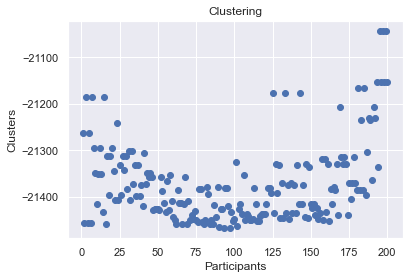

In [29]:
#Plotting
clusters = criterion.max(axis = 1)
fig,ax = plt.subplots()
ax.scatter(df['CustomerID'], clusters)
ax.set_xlabel("Participants")
ax.set_ylabel("Clusters")
ax.set_title("Clustering")
plt.show()